In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
sns.set()
import datetime

In [5]:
data = pd.read_csv('AAPL.csv')
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300
2018-09-17,222.149994,222.949997,217.270004,217.880005,214.550659,37195100
2018-09-18,217.789993,221.850006,217.119995,218.240005,214.905167,31571700


In [6]:
data_eng = data.loc[:, ['Adj Close', 'Volume']]
data_eng['HL_PCT'] = (data['High'] - data['Low']) / data['Close'] * 100.0
data_eng['PCT_change'] = (data['Close'] - data['Open']) / data['Open'] * 100

print(data_eng.describe())
print('')
print(data_eng.info())

        Adj Close        Volume      HL_PCT  PCT_change
count  252.000000  2.520000e+02  252.000000  252.000000
mean   190.758425  3.251784e+07    2.121338    0.033741
std     20.926060  1.392554e+07    1.072674    1.338646
min    140.505798  1.136200e+07    0.593915   -4.036195
25%    173.452965  2.285548e+07    1.341738   -0.738365
50%    195.877899  2.904540e+07    1.864340    0.076363
75%    206.560455  3.883658e+07    2.612961    0.811020
max    228.523819  9.624670e+07    6.687024    5.981116

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2018-09-12 to 2019-09-12
Data columns (total 4 columns):
Adj Close     252 non-null float64
Volume        252 non-null int64
HL_PCT        252 non-null float64
PCT_change    252 non-null float64
dtypes: float64(3), int64(1)
memory usage: 9.8+ KB
None


In [9]:
# data de validacion
n_valid = int(math.ceil(0.3 * len(data_eng)))

X_data = data_eng.drop(['Adj Close'], 1)
y_data = data_eng['Adj Close']

# Normalizacion
X_data = preprocessing.scale(X_data)

#Separacion data de entrenamiento y validacion
X_train = X_data[:-n_valid]
X_valid = X_data[-n_valid:]

y_train = np.array(y_data[:-n_valid])
y_valid = np.array(y_data[-n_valid:])

In [11]:
y_valid

array([177.555389, 176.708603, 177.625122, 174.407349, 172.644043,
       178.960052, 181.84906 , 184.518936, 189.430267, 191.851074,
       194.072632, 193.454987, 193.415115, 192.010468, 193.156113,
       197.698853, 197.121048, 198.705032, 198.027603, 197.828369,
       194.829758, 199.043747, 198.983978, 197.170853, 200.787125,
       201.962646, 203.636292, 203.45697 , 199.262909, 200.478302,
       202.460754, 200.986359, 202.530502, 204.433273, 203.725952,
       202.580307, 204.881561, 201.823181, 206.435654, 208.049515,
       207.880173, 206.23642 , 206.95369 , 208.886337, 207.989746,
       212.233627, 207.641068, 203.247772, 192.608185, 196.254333,
       198.286606, 202.659988, 200.990005, 200.479996, 208.970001,
       202.75    , 201.740005, 206.5     , 210.350006, 210.360001,
       212.639999, 212.460007, 202.639999, 206.490005, 204.160004,
       205.529999, 209.009995, 208.740005, 205.699997, 209.190002,
       213.279999, 213.259995, 214.169998, 216.699997, 223.589

In [30]:
from sklearn import svm

In [32]:
#----
# SVR
#----

In [17]:
clf = svm.SVR()

In [23]:
clf.fit(X_train, y_train)

C:\Users\arami\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
ySVR = clf.predict(X_valid)

In [27]:
ySVR

array([184.3031981 , 187.61014102, 187.47554928, 183.93934549,
       185.65960029, 189.36773529, 183.2230685 , 189.99697939,
       189.32813753, 187.75721493, 185.39033167, 187.5906715 ,
       186.12183901, 189.20004698, 188.86808929, 190.02590358,
       184.36778921, 185.40215257, 182.49436941, 187.02589953,
       183.71360152, 189.26032959, 185.85333241, 183.41817975,
       183.73183613, 188.30611658, 188.23628529, 188.14327105,
       184.88084725, 189.34266663, 188.57850497, 184.86956379,
       187.85565607, 188.18254657, 187.26093048, 186.58799878,
       188.73280888, 183.5986621 , 190.35685247, 187.16605724,
       188.22318154, 185.55738578, 187.58993236, 187.9176468 ,
       183.92536212, 184.69866476, 185.38529588, 182.8550298 ,
       184.36621181, 185.50857641, 189.26769866, 190.10034099,
       186.01751613, 187.94030697, 185.22179256, 183.50765274,
       184.83489791, 188.74400522, 185.71568823, 184.91358744,
       185.99657946, 185.90603271, 186.14113201, 186.36

In [33]:
#----
#K-NN
#----

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [36]:
yKNN = knn_model.predict(X_valid)

In [37]:
yKNN

array([185.3699522, 195.8655852, 183.3605316, 173.5557402, 183.7730684,
       185.820877 , 189.364096 , 196.5398866, 192.596353 , 186.6979248,
       192.4629362, 187.7985138, 206.056134 , 192.6274994, 187.5047608,
       196.897226 , 181.8739198, 196.4704956, 178.0950652, 181.0581724,
       183.8984466, 197.4325592, 177.9817532, 161.1665192, 187.5424224,
       184.4283388, 181.5007784, 176.300641 , 192.3988158, 191.92128  ,
       177.3525818, 191.1983704, 189.6026796, 184.4283388, 181.1395538,
       182.0029326, 182.570581 , 177.6315642, 192.4965028, 196.4263764,
       181.5007784, 188.360205 , 186.7306946, 180.5330812, 166.283731 ,
       179.7503724, 178.582016 , 173.0465238, 181.2710236, 186.5213474,
       195.9357086, 192.4497954, 198.3561552, 175.4352752, 182.92576  ,
       181.9620606, 196.7897676, 209.1157136, 196.0435636, 192.1703612,
       177.9817532, 197.6120972, 195.6414918, 197.9595094, 186.992865 ,
       182.9953248, 181.1494812, 193.5244754, 200.2773162, 183.9

In [43]:
#--------------
#NEURAL NETWORK
#--------------

In [44]:
from sklearn.neural_network import MLPRegressor

In [45]:
reg = MLPRegressor(hidden_layer_sizes=(100,100,100),  activation='relu', solver='adam',    alpha=0.0001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

In [46]:
reg = reg.fit(X_train, y_train)

In [47]:
yRN = reg.predict(X_valid)

In [48]:
yRN

array([182.34276311, 211.76956139, 189.3775418 , 193.93374309,
       182.15663627, 199.71089151, 204.77990486, 197.46897529,
       191.53726445, 202.58737914, 186.23940757, 194.00210078,
       207.33565772, 184.54132855, 182.4560084 , 198.92247438,
       190.48690953, 193.25907492, 200.77338994, 195.10984955,
       160.35189588, 214.71202647, 187.86118895, 166.75354431,
       182.10950527, 191.53986537, 199.04938241, 187.54278432,
       192.61025593, 193.58401589, 183.20232504, 195.86226003,
       193.8183859 , 191.35610867, 200.47355999, 202.48824517,
       180.73157732, 160.05374543, 190.5374271 , 198.31956877,
       193.68691205, 194.85075582, 194.38168315, 183.81389651,
       178.97232739, 173.93918536, 147.81121591, 185.13194491,
       183.47746713, 178.95189567, 198.3441925 , 202.33461879,
       203.61890594, 181.70860601, 159.24240394, 174.35115219,
       172.75169872, 210.95259732, 189.67651712, 188.6021899 ,
       187.69648295, 200.58509634, 191.89481787, 197.25

In [49]:
#COMPARISON

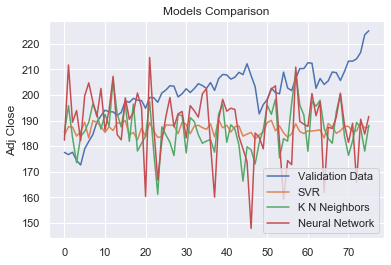

In [51]:
fig, ax = plt.subplots()

ax.set_title('Models Comparison')
ax.set_ylabel('Adj Close')

ax.plot(y_valid, label="Validation Data")
ax.plot(ySVR, label="SVR")
ax.plot(yKNN, label="K N Neighbors")
ax.plot(yRN, label="Neural Network")
plt.legend()

plt.show()